# K-Means Clustering

k-means clustering algorithm, BBC dataset.


## Data Prep


In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import scipy.io



In [33]:

bbc_mtx=scipy.io.mmread('bbc.mtx').todense().transpose()
bbc_terms=pd.read_csv('bbc.terms',sep ='\t', header=None,names=['words'])
bbc_df=pd.DataFrame(bbc_mtx, columns=bbc_terms['words'])
del bbc_df.index.name

document_class=pd.read_csv('bbc.classes', sep=' ', skiprows=[0,1,2,3], names=['index','class'])
document_class=document_class.set_index('index')
document_class=document_class.iloc[:,0]


In [34]:
bbc_df.head()

words,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,£339,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour
0,1.0,5.0,2.0,3.0,4.0,10.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
document_class

index
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2195    4
2196    4
2197    4
2198    4
2199    4
2200    4
2201    4
2202    4
2203    4
2204    4
2205    4
2206    4
2207    4
2208    4
2209    4
2210    4
2211    4
2212    4
2213    4
2214    4
2215    4
2216    4
2217    4
2218    4
2219    4
2220    4
2221    4
2222    4
2223    4
2224    4
Name: class, Length: 2225, dtype: int64

## Computing K-Means Clusters

In [35]:
from sklearn.cluster import KMeans
bbc_mat=bbc_df.as_matrix()

In [16]:
distortions=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='random', n_init=30, max_iter=300, random_state=0).fit(bbc_mat)
    distortions.append(km.inertia_)



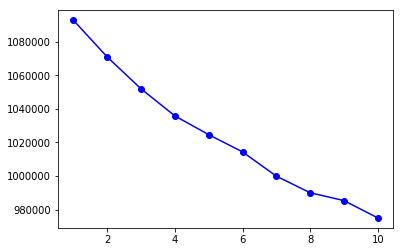

In [18]:
# plot distortion, not these attributes!
plt.plot(range(1,11),distortions, c='blue', marker='o')
plt.show()

##  
distortions are a list where the index corresponds to the total distortion using that number of clusters

In [20]:
# Output Distortions
a=['None']
distortions[0]='None'
a + distortions

['None',
 'None',
 1070889.8681838671,
 1051938.5474288887,
 1035834.9386071024,
 1024659.7688110314,
 1014414.0501342831,
 999965.29646604729,
 990088.66911816795,
 985420.27479406528,
 975103.74528361089]

In [21]:
#scale with min/max
from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()

bbc_mat_scaled = min_max_scaler.fit_transform(bbc_mat)
distortions2=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='random', n_init=30, max_iter=300, random_state=0).fit(bbc_mat_scaled)
    distortions2.append(km.inertia_)

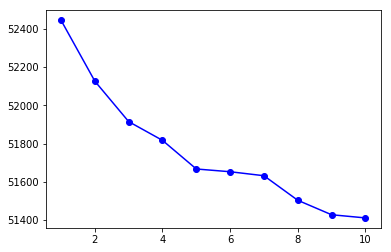

In [22]:
# update plot
plt.plot(range(1,11),distortions2, c='blue', marker='o')

plt.show()

In [25]:
# scale Boolean
bbc_mat2=bbc_mat
bbc_mat2[bbc_mat2 != 0]=1
distortions3=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='random', n_init=30, max_iter=300, random_state=0).fit(bbc_mat2)
    distortions3.append(km.inertia_)

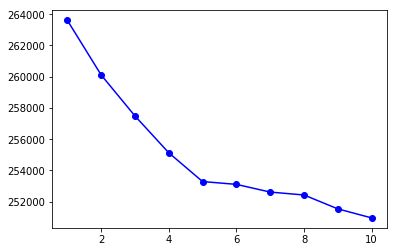

In [26]:
# update plot
plt.plot(range(1,11),distortions3, c='blue', marker='o')

plt.show()

In [27]:
# Output Scaled Distortions
distortions2[0]='None'
a + distortions2

['None',
 'None',
 52126.321592112996,
 51914.913496705696,
 51816.863743916903,
 51667.194738693717,
 51652.812150477177,
 51631.921171240996,
 51503.498798472858,
 51427.900834439955,
 51411.311880990936]

In [28]:
# Output Binary Distortions
distortions3[0]='None'
a + distortions3

['None',
 'None',
 260116.6405640911,
 257490.02839872747,
 255131.80428279497,
 253287.96490233613,
 253108.71214907069,
 252615.22843548973,
 252429.05559717535,
 251539.08186750309,
 250960.96576807476]

## Dimensionality Reduction via PCA

In [47]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 1000)
pca_model.fit(bbc_mat2)

# create cumulative sum of variance
variance = pca_model.explained_variance_ratio_ #calculate variance ratios                                        


# cumulative sum of variance, for the first [n] features

cv=np.cumsum(np.round(pca_model.explained_variance_ratio_,decimals=3)*100)



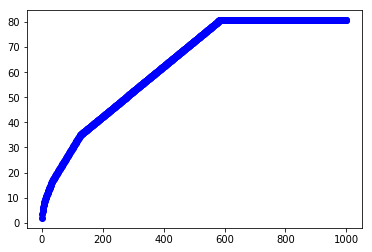

In [48]:
#Plot cv vs features
plt.plot(range(1,1001),cv, c='blue', marker='o')

plt.show()

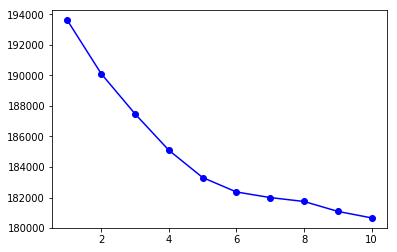

In [59]:
# Re-run PCA with the "correct" number of features and then run K-means in one the PCA transformed data.
pca_model2 = PCA(n_components = 600)
pca_model2.fit(bbc_mat2)

X_PCA=pca_model2.fit_transform(bbc_mat2)
distortions4=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='random', n_init=30, max_iter=300, random_state=0).fit(X_PCA)
    distortions4.append(km.inertia_)
plt.plot(range(1,11),distortions4, c='blue', marker='o')
plt.show()

## Results
number of features 

In [60]:
# Output Distortions
distortions4[0]='None'
a + distortions4

['None',
 'None',
 190118.48986792014,
 187488.84869942802,
 185106.49157289186,
 183315.23384209111,
 182368.7359789699,
 182001.68277157049,
 181745.88599990529,
 181097.30317880758,
 180670.16219389765]

## Evaluating Cluster Results


In [61]:
from statistics import mode
#mix_max_scaler produced the lowest distortion at k=5.

km5=KMeans(n_clusters=5, init='random', n_init=30, max_iter=300, random_state=0).fit(bbc_mat_scaled)


In [102]:
km5_df=pd.DataFrame(data=km5.labels_[:,], columns=['cluster'])
km5_df['document_class']=document_class
km5_df2 = km5_df.groupby('cluster').agg({'document_class': lambda x: x.mode()})
km5_df2

,document_class
cluster,
0,3
1,2
2,3
3,2
4,3


## Misclassification

In [99]:
km5_df.groupby(["cluster", "document_class"]).size().reset_index(name="Occurrences")

,cluster,document_class,Occurrences
0,0,0,452
1,0,1,364
2,0,2,142
3,0,3,490
4,0,4,156
5,1,2,1
6,2,3,1
7,3,0,58
8,3,1,22
9,3,2,274


## Misclassification rate
ratio between the number of misclassifications and the total number of rows.